In [158]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline

In [182]:
# Loading the CSV with pandas
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [183]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [184]:
sizes = df['Churn'].value_counts(sort = True)
sizes

No     5174
Yes    1869
Name: Churn, dtype: int64

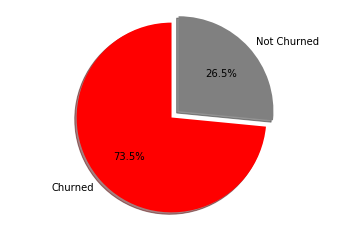

In [185]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Churned', 'Not Churned'
sizes = [5174, 1869]
colors = ["red","gray"]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Missing Values

In [186]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [187]:
df = df.dropna(how='all')

In [188]:
df = df[~df.duplicated()]

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Converting Numerical Features From Object

In [190]:
total_charges_filter = df['TotalCharges'] == " "

In [191]:
df = df[~total_charges_filter]

In [192]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

## Encoding features

In [112]:
#categorical_features = ['SeniorCitizen','gender','Partner','Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                     #   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    #    'Contract', 'PaymentMethod', 'PaperlessBilling']         

In [113]:
# making dataframe using get_dummies() 
#pd.get_dummies(df[categorical_features])

In [194]:
from sklearn.preprocessing import LabelEncoder 

In [195]:
le = LabelEncoder() 

In [196]:
df['gender']= le.fit_transform(df['gender']) 
df['Partner']= le.fit_transform(df['Partner']) 
df['Dependents']= le.fit_transform(df['Dependents']) 
df['PhoneService']= le.fit_transform(df['PhoneService']) 
df['MultipleLines']= le.fit_transform(df['MultipleLines']) 
df['InternetService']= le.fit_transform(df['InternetService']) 
df['OnlineSecurity']= le.fit_transform(df['OnlineSecurity']) 
df['OnlineBackup']= le.fit_transform(df['OnlineBackup']) 
df['DeviceProtection']= le.fit_transform(df['DeviceProtection']) 
df['TechSupport']= le.fit_transform(df['TechSupport']) 
df['StreamingTV']= le.fit_transform(df['StreamingTV'])
df['StreamingMovies']= le.fit_transform(df['StreamingMovies']) 
df['Contract']= le.fit_transform(df['Contract'])
df['PaymentMethod']= le.fit_transform(df['PaymentMethod']) 
df['PaperlessBilling']= le.fit_transform(df['PaperlessBilling'])

In [197]:
df['Churn']= le.fit_transform(df['Churn']) 

## Scaling Features

In [198]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [199]:
df['tenure'] = np.array(df['tenure'])
df['MonthlyCharges'] = np.array(df['MonthlyCharges'])
df['TotalCharges'] = np.array(df['TotalCharges'])

In [200]:
df['tenure'] = preprocessing.scale(df['tenure'])
df['MonthlyCharges'] = preprocessing.scale(df['MonthlyCharges'])
df['TotalCharges'] = preprocessing.scale(df['TotalCharges'])

In [201]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,-1.280248,0,1,0,0,...,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,5575-GNVDE,1,0,0,0,0.064303,1,0,0,2,...,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,3668-QPYBK,1,0,0,0,-1.239504,1,0,0,2,...,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,7795-CFOCW,1,0,0,0,0.512486,0,1,0,2,...,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,9237-HQITU,0,0,0,0,-1.239504,1,0,1,0,...,0,0,0,0,0,1,2,0.196178,-0.940457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,-0.343137,1,2,0,2,...,2,2,2,2,1,1,3,0.664868,-0.129180,0
7039,2234-XADUH,0,0,1,1,1.612573,1,2,1,0,...,2,0,2,2,1,1,1,1.276493,2.241056,0
7040,4801-JZAZL,0,0,1,1,-0.872808,0,1,0,2,...,0,0,0,0,0,1,2,-1.170004,-0.854514,0
7041,8361-LTMKD,1,1,1,0,-1.158016,1,2,1,0,...,0,0,0,0,0,1,3,0.319168,-0.872095,1


## Spliting Dataset

In [204]:
df['Churn'] = df["Churn"].astype(int)
X = df.drop(labels = ["Churn", 'customerID'],axis = 1)
y = df['Churn']

In [205]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.343137,1,2,0,2,0,2,2,2,2,1,1,3,0.664868,-0.129180
7039,0,0,1,1,1.612573,1,2,1,0,2,2,0,2,2,1,1,1,1.276493,2.241056
7040,0,0,1,1,-0.872808,0,1,0,2,0,0,0,0,0,0,1,2,-1.170004,-0.854514
7041,1,1,1,0,-1.158016,1,2,1,0,0,0,0,0,0,0,1,3,0.319168,-0.872095


In [206]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [207]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [208]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
852,1,0,0,0,-1.239504,1,2,2,1,1,1,1,1,1,0,0,3,-1.327896,-0.980010
2127,1,0,1,0,0.308766,0,1,0,2,2,2,0,0,0,1,1,2,-0.746188,-0.250087
597,1,0,0,0,-1.158016,1,2,0,0,0,0,2,0,2,0,0,3,0.024990,-0.902714
206,1,0,1,1,1.612573,0,1,0,2,2,2,2,0,2,2,1,1,-0.310739,0.836447
5014,1,1,1,0,1.571829,0,1,0,0,2,2,0,2,2,0,1,0,-0.415446,0.653729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1,0,0,0,-0.669089,1,0,1,0,0,0,2,0,0,0,1,1,0.324154,-0.490954
5704,0,0,1,0,-0.546857,1,2,1,0,0,0,0,2,0,0,1,2,0.733011,-0.317170
1366,1,0,1,0,-0.913552,1,2,1,0,0,0,0,2,0,0,1,2,0.691461,-0.648303
1552,0,0,1,1,-0.057929,1,2,0,0,2,0,2,2,2,2,0,0,0.523597,0.083075


In [209]:
y_train

852     0
2127    1
597     0
206     0
5014    0
       ..
600     0
5704    0
1366    1
1552    0
4967    1
Name: Churn, Length: 5625, dtype: int32

## Logistic Regression & Model Testing

In [210]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [211]:
from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8073916133617626


The score show us that in 80% of the cases our model predicted the right outcome for our binary classification problem. That’s considered quite good for a first run, especially when we look which impact each variable has and if that makes sense. So with the final objective to reduce churn and take the right preventing actions in time, we want to know which independent variables have to most influence on our predicted outcome. Therefore we set the coefficients in our model to zero and look at the weights of each variable.

In [212]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
 index=X.columns.values)

weights.sort_values(ascending = False)

MonthlyCharges      0.719823
TotalCharges        0.520061
PaperlessBilling    0.340951
InternetService     0.252374
SeniorCitizen       0.227322
MultipleLines       0.060397
PaymentMethod       0.041482
gender              0.032305
Partner             0.010610
StreamingTV         0.004725
StreamingMovies    -0.015287
DeviceProtection   -0.080637
OnlineBackup       -0.124415
Dependents         -0.135383
TechSupport        -0.275569
OnlineSecurity     -0.288026
Contract           -0.750955
PhoneService       -0.993026
tenure             -1.284111
dtype: float64

It can be observed that some variables have a positive relation to our predicted variable and some have a negative relation. A positive value has a positive impact on our predicted variable. A good example is “Contract_Month-to-month”: The positive relation to churn means that having this type of contract also increases the probability of a customer to churn. On the other hand that “Contract_Two year” is in a highly negative relation to the predicted variable, which means that customers with this type of contract are very unlikely to churn. But we can also see that some variables do not make sense in the first point. “Fiber_Optic” is on top position in terms of a positive impact on churn. While we would expect that this makes a customer stay, as it provides him with fast internet, our model says different. Here it is important to dig deeper and get some context for the data.

In [213]:
from sklearn.metrics import classification_report,confusion_matrix

In [214]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1052
           1       0.64      0.54      0.59       355

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [215]:
from sklearn.metrics import recall_score
recall_average = recall_score(y_test, prediction_test, average="binary", pos_label=0)

In [216]:
print(recall_average)

0.8973384030418251


In [217]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, prediction_test)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.46


In [218]:
print(confusion_matrix(y_test, prediction_test))

[[944 108]
 [163 192]]


In [219]:
df['proba'] = model.predict_proba(df[X_train.columns])[:,1]

In [242]:
df_1 = pd.DataFrame(df[['customerID', 'proba']])

In [248]:
df_1.head(10)

,customerID,proba
0,7590-VHVEG,0.578156
1,5575-GNVDE,0.051815
2,3668-QPYBK,0.329336
3,7795-CFOCW,0.030287
4,9237-HQITU,0.669392
5,9305-CDSKC,0.764240
6,1452-KIOVK,0.561841
7,6713-OKOMC,0.324549
8,7892-POOKP,0.555523
9,6388-TABGU,0.012473


In [249]:
df_1[df_1['proba']>0.6]

,customerID,proba
4,9237-HQITU,0.669392
5,9305-CDSKC,0.764240
20,8779-QRDMV,0.702231
31,4929-XIHVW,0.794468
36,6047-YHPVI,0.644459
...,...,...
7010,0723-DRCLG,0.766472
7018,1122-JWTJW,0.665296
7029,2235-DWLJU,0.710883
7032,6894-LFHLY,0.775841


In [222]:
from sklearn import metrics

In [223]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_test))
print('MSE:', metrics.mean_squared_error(y_test, prediction_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_test)))

MAE: 0.19260838663823737
MSE: 0.19260838663823737
RMSE: 0.43887172002561
